## Test for Data Analyst position
***
### Part 1
We are running a special event in the game:

In the attached excel you have extracted a data set of how many users have completed each mission, by level.

Missions can be skipped by paying premium currency. Cost to skip a specific mission is listed on column E in the file.

Users can buy of premium currency at a rate of 100 for $4.99

The candidate would need to run an analysis on this data set and provide visualizations of the data that support their findings. Please compose a report with Power Point to deliver your findings, assuming you will present it to game designers.

***
### <font color='red'> In red letters we will discuss: </font>

<font color='red'> * What the candidate for this position could have done better </font>

<font color='red'> * How tasks were failed </font>

<font color='red'> * Other solutions they might have considered </font>

<font color='red'> * Why </font>

***
### <font color='red'> I will play the role of both the candidate for this Data Analyst position and the "judge". </font> 
### <font color='red'> Please, use the study for interview preparation or exploring the world of Jupyter Notebook. This document is for educational purposes and should not be copied or used commercially. </font>
### <font color='red'> Thank you! </font> 

In [4]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/nkantardzhieva/Downloads/Test Data analyst (1).xlsx'
excel_data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to understand its structure
excel_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,player level,Mission names,users Starting mission,Skipped mission,Premium currency cost of skip
1,2,Chapter1_mission1,423821,2668,15
2,2,Chapter1_mission2,225147,2599,15
3,2,Chapter1_mission3,130801,2829,15
4,2,Chapter1_mission4,59202,3657,15


***
### 1. We would like to see the following analysis:
### Churn analysis:
##### - Which missions are we losing most players at? - 
This involves finding the missions with the highest number of skips.
##### - Do we see different behavior depending on player level? - 
For this, we'll analyze the data by grouping players into levels (using buckets of 5 or 10 levels) to see the trend in mission skips.

### * First, let's clean the data a bit, renaming columns for ease of use, and then answer these questions.

In [6]:
# Rename the columns for easier manipulation
cleaned_data = excel_data.rename(columns={
    'Unnamed: 0': 'player_level',
    'Unnamed: 1': 'mission_names',
    'Unnamed: 2': 'users_starting_mission',
    'Unnamed: 3': 'skipped_mission',
    'Unnamed: 4': 'premium_currency_cost_of_skip'
}).iloc[1:]  # Skip the first row which is a header

In [7]:
# Convert columns to appropriate data types
cleaned_data['player_level'] = pd.to_numeric(cleaned_data['player_level'])
cleaned_data['users_starting_mission'] = pd.to_numeric(cleaned_data['users_starting_mission'])
cleaned_data['skipped_mission'] = pd.to_numeric(cleaned_data['skipped_mission'])
cleaned_data['premium_currency_cost_of_skip'] = pd.to_numeric(cleaned_data['premium_currency_cost_of_skip'])

In [9]:
# 1. Which missions are we losing most players at?
missions_with_most_skips = cleaned_data.groupby('mission_names')['skipped_mission'].sum().reset_index().sort_values(by='skipped_mission', ascending=False)

In [10]:
# 2. Do we see different behavior depending on player level? (Grouped by 5 and 10 levels)
# Group by 5 levels
group_5 = cleaned_data.copy()
group_5['level_group_5'] = pd.cut(group_5['player_level'], bins=range(0, cleaned_data['player_level'].max() + 5, 5), right=False)
group_5_summary = group_5.groupby('level_group_5').agg(total_starting=('users_starting_mission', 'sum'), total_skipped=('skipped_mission', 'sum')).reset_index()

In [11]:
# Group by 10 levels
group_10 = cleaned_data.copy()
group_10['level_group_10'] = pd.cut(group_10['player_level'], bins=range(0, cleaned_data['player_level'].max() + 10, 10), right=False)
group_10_summary = group_10.groupby('level_group_10').agg(total_starting=('users_starting_mission', 'sum'), total_skipped=('skipped_mission', 'sum')).reset_index()

missions_with_most_skips.head(), group_5_summary, group_10_summary

(        mission_names  skipped_mission
 3   Chapter1_mission4            27163
 10  Chapter2_mission6            21781
 9   Chapter2_mission5            17710
 2   Chapter1_mission3            14145
 4   Chapter1_mission5            11546,
   level_group_5  total_starting  total_skipped
 0        [0, 5)         2348645          39353
 1       [5, 10)         3297050          46874
 2      [10, 15)         2079706          29141
 3      [15, 20)         1454060          17158
 4      [20, 25)         1066740          11017
 5      [25, 30)          700787           5750
 6      [30, 35)          590019           2714
 7      [35, 40)          458252           1725
 8      [40, 45)          141887            621,
   level_group_10  total_starting  total_skipped
 0        [0, 10)         5645695          86227
 1       [10, 20)         3533766          46299
 2       [20, 30)         1767527          16767
 3       [30, 40)         1048271           4439
 4       [40, 50)          141887

## Which missions are we losing most players at?
The top missions where most players are skipping are:

### <font color='green'>1. Chapter1_mission4 with 27,163 skips.</font>
### <font color='green'>2. Chapter2_mission6 with 21,781 skips.</font>
### <font color='green'>3. Chapter2_mission5 with 17,710 skips.</font>
### <font color='green'>4. Chapter1_mission3 with 14,145 skips.</font>
### <font color='green'>5. Chapter1_mission5 with 11,546 skips.</font>

## Do we see different behavior depending on player level?
When grouping the data by player levels in buckets of 5:

### <font color='green'>1. Levels 0-5: 2,348,645 total starting, 39,353 total skipped</font>
### <font color='green'>2. Levels 5-10: 3,297,050 total starting, 46,874 total skipped</font>
### <font color='green'>3. Levels 10-15: 2,079,706 total starting, 29,141 total skipped</font>
### <font color='green'>4. Levels 15-20: 1,454,060 total starting, 17,158 total skipped</font>
### <font color='green'>5. Levels 20-25: 1,066,740 total starting, 11,017 total skipped</font>
### <font color='green'>6. Levels 25-30: 700,787 total starting, 5,750 total skipped</font>
### <font color='green'>7. Levels 30-35: 590,019 total starting, 2,714 total skipped</font>
### <font color='green'>8. Levels 35-40: 458,252 total starting, 1,725 total skipped</font>
### <font color='green'>9. Levels 40-45: 141,887 total starting, 621 total skipped</font>
And when grouping by player levels in buckets of 10:

### <font color='green'>1. Levels 0-10: 5,645,695 total starting, 86,227 total skipped</font>
### <font color='green'>2. Levels 10-20: 3,533,766 total starting, 46,299 total skipped</font>
### <font color='green'>3. Levels 20-30: 1,767,527 total starting, 16,767 total skipped</font>
### <font color='green'>4. Levels 30-40: 1,048,271 total starting, 4,439 total skipped</font>
### <font color='green'>5. Levels 40-50: 141,887 total starting, 621 total skipped</font>

***
These results show that the number of players starting and skipping missions decreases as player levels increase. Grouping by either 5 or 10 levels provides a clear view of how player engagement with missions changes across different stages of their progression. 

***
### <font color='red'> Let's explore why this task was failed by the candidate: </font>
<font color='red'> The processed Churn analysis has the purpose of discovering how many people start, how many people skip and how these numbers vary through different levels. The two variables shouldn't be compared with one another. Instead we should have measured the decreasing number of players starting each level and the percentage of this progressive loss of players. The same calculation should be done for players who skipped. </font>

***
## Revenue analysis:
### - How much revenue did we generate with the event? - <font color='green'>The total revenue generated from the event is approximately $224,111.38.</font>
### - Which levels generated more money? - For the revenue generated by each level, the top levels in terms of revenue are:

### <font color='green'> Level 4: 14,099.49;</font>
### <font color='green'> Level 3: 13,651.89;</font>
### <font color='green'> Level 5: 13,502.69;</font>
### <font color='green'> Level 6: 12,854.24;</font>
### <font color='green'> Level 2: 12,354.99;</font>
 And so on, with levels generating varying amounts of revenue.;

## SQL Query for Total Revenue:

SELECT SUM(skipped_mission * premium_currency_cost_of_skip / 100 * 4.99) AS total_revenue FROM missions;

## SQL Query for Revenue by Level

SELECT player_level, SUM(skipped_mission * premium_currency_cost_of_skip / 100 * 4.99) AS revenue
FROM missions
GROUP BY player_level
ORDER BY revenue DESC;


*** 
## *** Visualizations:
***
### 1. Which missions are we losing most players at?:

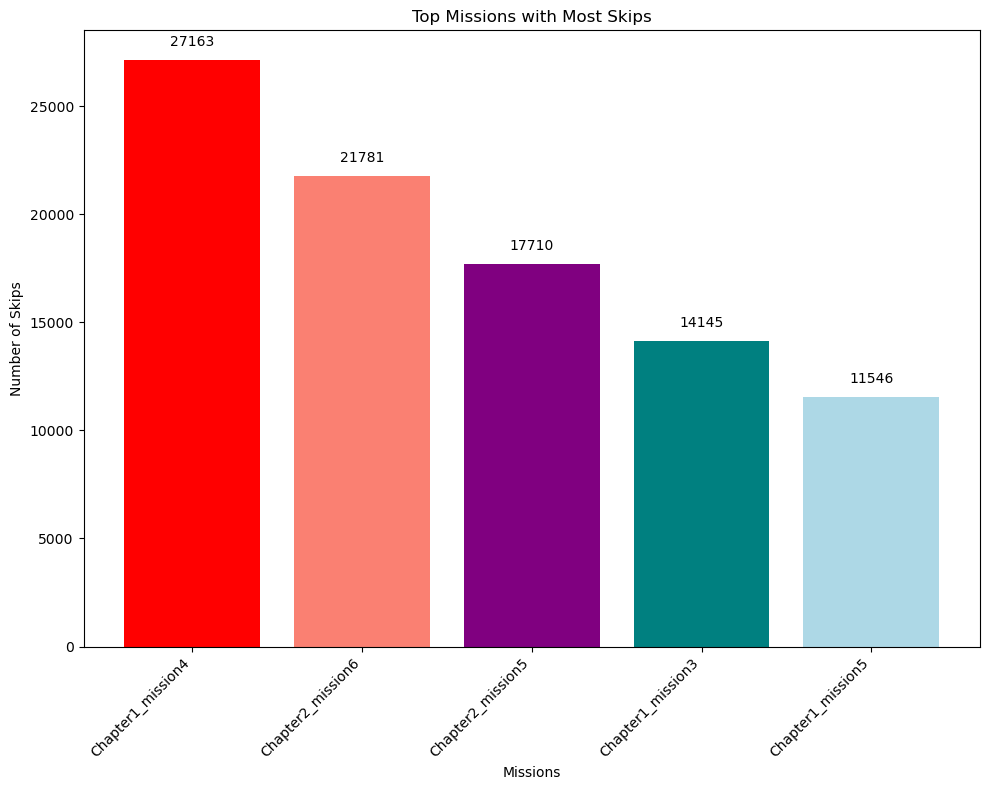

In [35]:
import matplotlib.pyplot as plt

# Mission names and the number of skips
missions = ['Chapter1_mission4', 'Chapter2_mission6', 'Chapter2_mission5', 'Chapter1_mission3', 'Chapter1_mission5']
skips = [27163, 21781, 17710, 14145, 11546]

# Creating the bar chart
color = ['red', 'salmon', 'purple', 'teal', 'lightblue']
plt.figure(figsize=(10, 8))  
plt.bar(missions, skips, color=color)

# Adding title and labels
plt.title('Top Missions with Most Skips')
plt.xlabel('Missions')
plt.ylabel('Number of Skips')

# Adding the number of skips on top of the bars
for i, skip in enumerate(skips):
    plt.text(i, skip + 500, str(skip), ha = 'center', va = 'bottom')  # Adjusting the position of the text for readability

# Rotating mission names for better visibility
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()  # Adjusting subplot params to give some padding
plt.show()


***
### <font color='red'> Why is this calculation going in the wrong direction: </font>
<font color='red'> The candidate should have prioritised the decreasing number of players starting each level and how many of them has the game lost per each mission.  </font>

### 2. Do we see different behavior depending on player level?:

#### - Visualization for Player Levels Grouped in Buckets of 5:

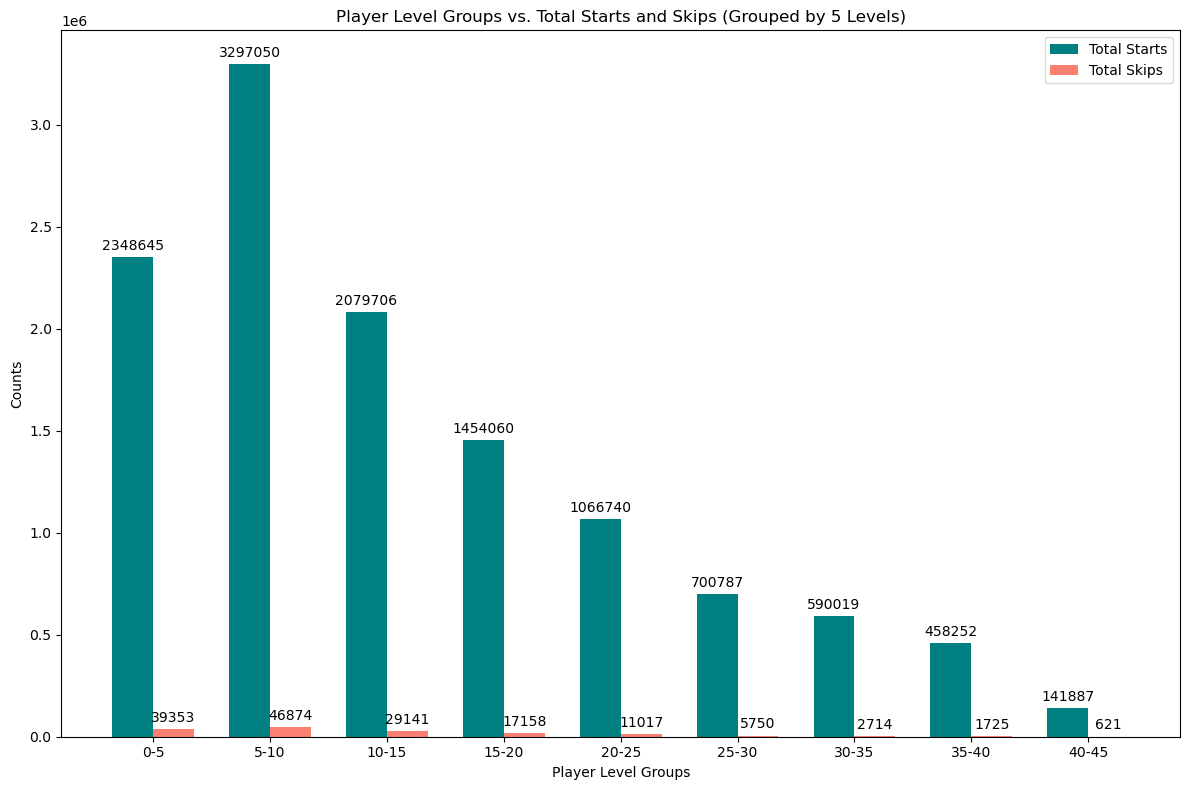

In [34]:
import numpy as np

# Data
level_groups_5 = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45']
starts_5 = [2348645, 3297050, 2079706, 1454060, 1066740, 700787, 590019, 458252, 141887]
skips_5 = [39353, 46874, 29141, 17158, 11017, 5750, 2714, 1725, 621]

# Plotting
x = np.arange(len(level_groups_5))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, starts_5, width, label='Total Starts', color='teal')
rects2 = ax.bar(x + width/2, skips_5, width, label='Total Skips', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Player Level Groups')
ax.set_ylabel('Counts')
ax.set_title('Player Level Groups vs. Total Starts and Skips (Grouped by 5 Levels)')
ax.set_xticks(x)
ax.set_xticklabels(level_groups_5)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#### - Visualization for Player Levels Grouped in Buckets of 10:

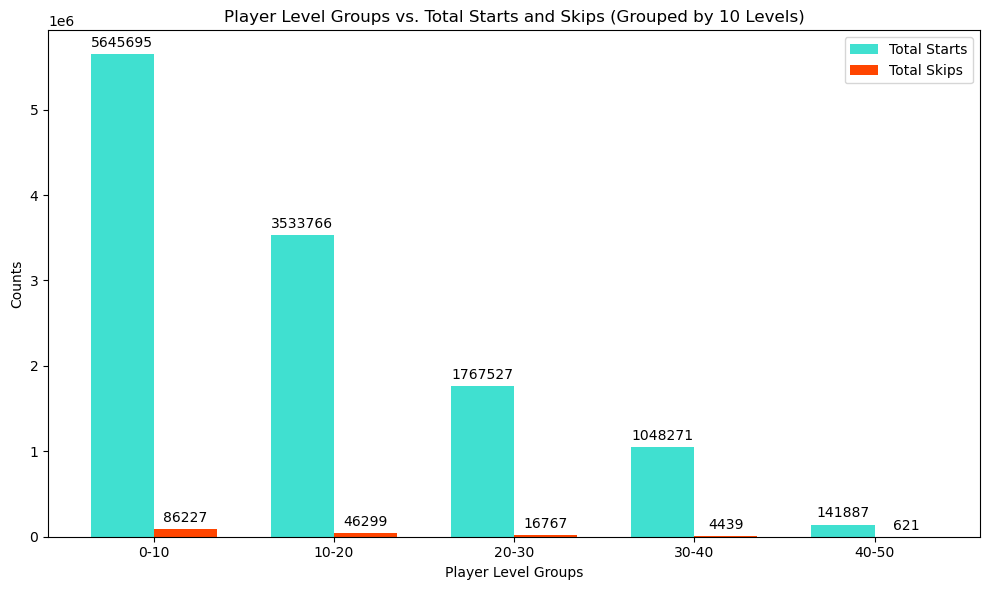

In [43]:
# Data
level_groups_10 = ['0-10', '10-20', '20-30', '30-40', '40-50']
starts_10 = [5645695, 3533766, 1767527, 1048271, 141887]
skips_10 = [86227, 46299, 16767, 4439, 621]

# Plotting
x = np.arange(len(level_groups_10))  # label loc

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, starts_10, width, label='Total Starts', color='turquoise')
rects2 = ax.bar(x + width/2, skips_10, width, label='Total Skips', color='orangered')

# labels
ax.set_xlabel('Player Level Groups')
ax.set_ylabel('Counts')
ax.set_title('Player Level Groups vs. Total Starts and Skips (Grouped by 10 Levels)')
ax.set_xticks(x)
ax.set_xticklabels(level_groups_10)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

***
### <font color='red'> What could the candidat have added: </font>
<font color='red'> A better approach would be for the candidate to compare percentage ratios between Total Starts and Total Skips for each level group. Using this method we could easily examine that 1.52% of Group Lvl(0-10) players skip and only 0.43% of Lvl(40-50) do the same. That would mean that lower level players are 3 times more likely to skip a level than higer lever ones. </font>

***
### 3. How much revenue did we generate with the event?

In [47]:
# Cleaning and renaming the columns
actual_data_cleaned = excel_data.rename(columns={
    excel_data.columns[0]: 'player_level',
    excel_data.columns[1]: 'mission_names',
    excel_data.columns[2]: 'users_starting_mission',
    excel_data.columns[3]: 'skipped_mission',
    excel_data.columns[4]: 'premium_currency_cost_of_skip'
}).iloc[1:]

# Convert columns to appropriate data types
actual_data_cleaned['player_level'] = pd.to_numeric(actual_data_cleaned['player_level'])
actual_data_cleaned['users_starting_mission'] = pd.to_numeric(actual_data_cleaned['users_starting_mission'])
actual_data_cleaned['skipped_mission'] = pd.to_numeric(actual_data_cleaned['skipped_mission'])
actual_data_cleaned['premium_currency_cost_of_skip'] = pd.to_numeric(actual_data_cleaned['premium_currency_cost_of_skip'])

# Calculate the revenue generated from skipped missions
actual_data_cleaned['revenue_per_mission'] = (actual_data_cleaned['skipped_mission'] * actual_data_cleaned['premium_currency_cost_of_skip'] / 100) * 4.99

# Revenue generated by each level
actual_revenue_by_level = actual_data_cleaned.groupby('player_level')['revenue_per_mission'].sum().reset_index().sort_values(by='player_level')

actual_revenue_by_level


,player_level,revenue_per_mission
0,2,12354.9905
1,3,13651.8915
2,4,14099.4945
3,5,13502.6905
4,6,12854.2400
5,7,9175.8615
6,8,9164.3845
7,9,6840.2920
8,10,7511.6965
9,11,8160.1470


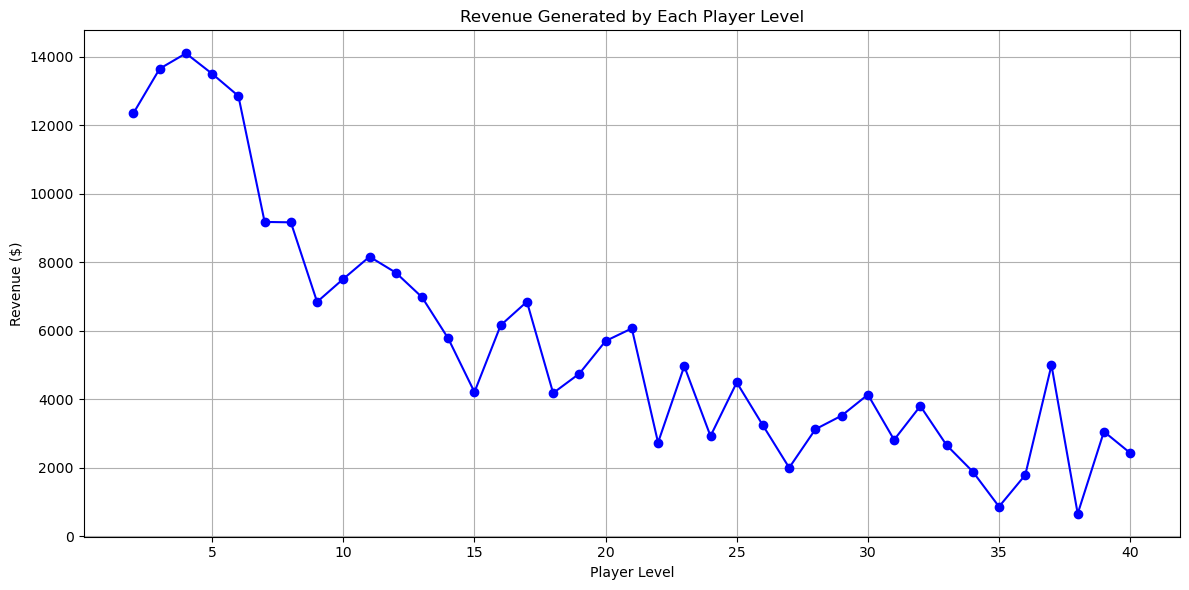

In [48]:
player_levels = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
revenues = [
    12354.99, 13651.89, 14099.49, 13502.69, 12854.24,
    9175.86, 9164.38, 6840.29, 7511.69, 8160.14,
    7695.32, 6978.01, 5772.93, 4206.32, 6157.41,
    6846.03, 4177.62, 4745.73, 5698.33, 6065.59,
    2731.52, 4963.80, 2920.89, 4487.50, 3230.77,
    1996.99, 3121.74, 3517.70, 4131.72, 2811.86,
    3798.88, 2656.92, 1882.22, 860.77, 1784.67,
    4992.49, 654.18, 3052.88, 2427.38
]

plt.figure(figsize=(12, 6))  
plt.plot(player_levels, revenues, marker='o', linestyle='-', color='b') 

# title and labels
plt.title('Revenue Generated by Each Player Level')
plt.xlabel('Player Level')
plt.ylabel('Revenue ($)')

plt.grid(True) 
plt.tight_layout()
plt.show()


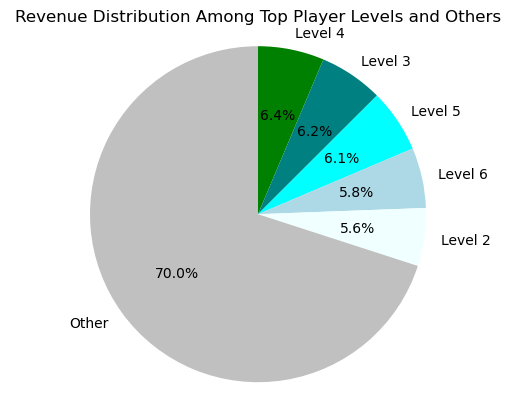

In [67]:
import matplotlib.pyplot as plt

# Data
player_levels = [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40
]
revenues = [
    12354.99, 13651.89, 14099.49, 13502.69, 12854.24,
    9175.86, 9164.38, 6840.29, 7511.69, 8160.14,
    7695.32, 6978.01, 5772.93, 4206.32, 6157.41,
    6846.03, 4177.62, 4745.73, 5698.33, 6065.59,
    2731.52, 4963.80, 2920.89, 4487.50, 3230.77,
    1996.99, 3121.74, 3517.70, 4131.72, 2811.86,
    3798.88, 2656.92, 1882.22, 860.77, 1784.67,
    4992.49, 654.18, 3052.88, 2427.38
]

# Sort the revenues and player levels by revenue in descending order
sorted_indices = sorted(range(len(revenues)), key=lambda i: revenues[i], reverse=True)
sorted_revenues = [revenues[i] for i in sorted_indices]
sorted_levels = [player_levels[i] for i in sorted_indices]

# Take top N levels to show on the pie chart and sum the rest as "Other"
top_n = 5
top_revenues = sorted_revenues[:top_n]
top_levels = sorted_levels[:top_n]
other_revenue = sum(sorted_revenues[top_n:])
top_revenues.append(other_revenue)
top_levels = [f'Level {level}' for level in top_levels]
top_levels.append('Other')

# Plot
color = ['green', 'teal', 'aqua', 'lightblue', 'azure', 'silver']
fig, ax = plt.subplots()
ax.pie(top_revenues, labels=top_levels, autopct='%1.1f%%', startangle=90, counterclock=False, colors=color)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Revenue Distribution Among Top Player Levels and Others')
plt.show()


***
# Part 2 – A/B Test
***
#### WE have just completed an AB test on a monetization-driving feature and we got these results:
***
GROUP A (Control) with ARPDAU of 0.15 and ARPPU of 30

GROUP B with ARPDAU of 0.16 and ARPPU of 16

### Questions:
#### 1.What scenario would you pick to be the winner? Why?
#### 2.Why do you think the ARPDAU and ARPPU values are behaving this way? What is influencing them?
#### 3.What feature could we have tested to get these results?

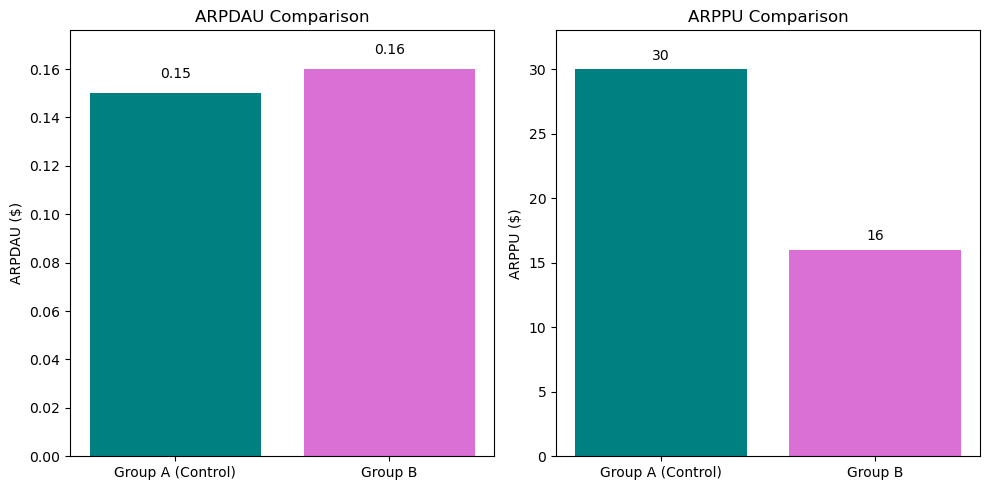

In [71]:
# Data
groups = ['Group A (Control)', 'Group B']
arpdau = [0.15, 0.16] 
arppu = [30, 16] 

# ARPDAU
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(groups, arpdau, color=['teal', 'orchid'])
plt.title('ARPDAU Comparison')
plt.ylabel('ARPDAU ($)')
plt.ylim(0, max(arpdau) * 1.1)
for i, value in enumerate(arpdau):
    plt.text(i, value + 0.005, str(value), ha='center', va='bottom')

# ARPPU
plt.subplot(1, 2, 2)
plt.bar(groups, arppu, color=['teal', 'orchid'])
plt.title('ARPPU Comparison')
plt.ylabel('ARPPU ($)')
plt.ylim(0, max(arppu) * 1.1)
for i, value in enumerate(arppu):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 1. Winner Scenario:
-
In terms of ARPDAU (Average Revenue Per Daily Active User), Group B has a higher value (0.16) compared to Group A (0.15). So, if the main goal is to maximize revenue generated per active user per day, Group B seems to be the winner.
-
However, in terms of ARPPU (Average Revenue Per Paying User), Group A has a significantly higher value (30) compared to Group B (16). If the focus is on maximizing revenue from paying users, Group A would be considered the winner.

## 2. ARPDAU and ARPPU Behavior:
-
ARPDAU (Average Revenue Per Daily Active User) is influenced by the overall monetization strategy, including factors such as the pricing of in-game items, the frequency of purchases, and the engagement of users with the monetization features.
-
ARPPU (Average Revenue Per Paying User) is heavily influenced by the purchasing behavior of users who make transactions within the game. It can be affected by the attractiveness of offers, pricing strategies, and the number of paying users.
-
The increase in ARPDAU in Group B could be attributed to a higher engagement level or more frequent purchases by users in that group. Conversely, the decrease in ARPPU in Group B might indicate that although more users are spending money, they are spending less per transaction compared to Group A.

## 3. Feature Tested:
-
Based on the results, it seems that the AB test was likely focused on a monetization-driving feature. This feature could be something related to in-app purchases, special offers, subscription models, or any other mechanism aimed at increasing revenue.
-
Potential features that could have been tested include:

    * Introducing new in-game items or content.

    * Adjusting pricing strategies for existing items.

    * Implementing limited-time offers or discounts.

    * Changing the user interface to make purchasing options more prominent.

    * Introducing a subscription service with exclusive benefits.
***
#### Overall, the choice of the "winner" scenario depends on the specific goals and priorities of the business. If the focus is on increasing overall revenue per user, Group B may be preferred due to its higher ARPDAU. However, if maximizing revenue from paying users is the priority, Group A might be considered the winner because of its higher ARPPU.

***
### <font color='red'> What was the intended direction for the candidate to think in: </font>
<font color='red'> Chooseing a group, preferably Group B, and arguing the benefits of their choice. They have a great argument difending each group. The missing link might be a hypothetical scenario using data from the previous task, where generated income for Group A and Group B is compared.  </font>